# IMPORTING NGN DATASET 1 USING PANDAS...

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)

In [6]:
from nltk.corpus import stopwords

st = stopwords.words("english")
print(st)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\binary/nltk_data'
    - 'C:\\Users\\binary\\anaconda3\\nltk_data'
    - 'C:\\Users\\binary\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\binary\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\binary\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [3]:

data_ngn = pd.read_csv('sms_spam_ham_ng.csv')
data_ngn.head()
#data_ngn.tail()

,label,message
0,0,*IMPORTANT* NetBank Security requires you to a...
1,0,Win a ÃÂ¥ÃÂ£1000 cash prize or a prize worth...
2,0,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
3,0,"Sequel to the receipt of your Resume, the Boar..."
4,0,WIN a ÃÂ¥ÃÂ£200 Shopping spree every WEEK St...


# CLEANING NGN DATASET.. 

In [3]:
#data_ngn.to_string()
import string
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords

# print(string.punctuation)
stop_word = stopwords.words('english')

def preprocessing(text):
    st = PorterStemmer()
    clean_puct = ''.join([p for p in text if not p in string.punctuation])    
    # tokinization of each row (message)
    token = word_tokenize(clean_puct)
    
    # to remove somethin of this nature in dataset %&*^*^%£500
    #   and stemming individuals word using porter stemmer 
    clean_tok = []
    for tok in token:
        found = re.search('([£][0-9]+)', tok)
        if found:
            clean_tok.append(found.group(0))
        else:
            clean_tok.append(st.stem(tok))
    token = clean_tok


    punc = [t for t in token if not t in string.punctuation]
#     clean_words = [t for t in punc if not t in stop_word ]
    return punc

#     end of preprocessing method

    
data_ngn['message'] = data_ngn['message'].apply(lambda x:preprocessing(x))
data_ngn.head()
# data_ngn['clean_message'].to_string()

C:\Users\orsaater\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\orsaater\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://n

,label,message
0,0,"[import, netbank, secur, requir, you, to, auth..."
1,0,"[win, a, £1000, cash, prize, or, a, prize, wor..."
2,0,"[UR, go, 2, bahama, callfreefon, 08081560665, ..."
3,0,"[sequel, to, the, receipt, of, your, resum, th..."
4,0,"[win, a, £200, shop, spree, everi, week, start..."


# DATA EXPLORATION ON NGN DATASET

In [4]:
# checking for empty row
print('Empty message = ' , data_ngn['message'].isnull().sum())
print('No of messages ' , len(data_ngn))
print('Columns ', len(data_ngn.columns))

Empty message =  0
No of messages  1008
Columns  2


# converting 0 = spam 

In [5]:
data_ngn['label'] = ['spam' for label in data_ngn['label'] ]
data_ngn.head()

,label,message
0,spam,"[import, netbank, secur, requir, you, to, auth..."
1,spam,"[win, a, £1000, cash, prize, or, a, prize, wor..."
2,spam,"[UR, go, 2, bahama, callfreefon, 08081560665, ..."
3,spam,"[sequel, to, the, receipt, of, your, resum, th..."
4,spam,"[win, a, £200, shop, spree, everi, week, start..."


# SPLITTING NGN DATASE TO TRAIN AND TEST 

# IMPORT DATASET SMS_spam Kaggle 

In [6]:
import pandas as pd 

pd.set_option.display_max_row = 100
dataset  = pd.read_csv('SMSSPamCollection', sep='\t' , header=None)
dataset.columns = ['label', 'message']
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# DATA EXPLORATION ON KAGGLE DATASET

In [7]:
import matplotlib.pyplot as pyt
import numpy as np

# getting size of ham and spam in the message .... 
ham_size = len([ham for ham in dataset['label'] if ham =='ham'])
spam_size = len([spam for spam in dataset['label'] if spam == 'spam'])
print(f'ham lenght:{ham_size} spam lenght:{spam_size}')

#dataset visualization
X = np.array(['HAM', 'SPAM'])
y = np.array([ham_size, spam_size])
pyt.bar(X,y)
pyt.show()

ham lenght:4825 spam lenght:747


<Figure size 640x480 with 1 Axes>

# 

# data preprocessing 

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import pandas as pd

ps = PorterStemmer()
print(ps.stem('goes'))
stopword = stopwords.words('english')
# print(st)

def clean_dataset(data):
    sentence = ''.join([t for t in data if not t in string.punctuation])
    token = word_tokenize(sentence)
    stem_token = [ps.stem(word) for word in token if word not in stopword]
    return stem_token

dataset['message'] = dataset['message'].apply(lambda a: clean_dataset(a))
# dataset['msg_clean'] = [message for message in dataset['message']]
dataset.head()

goe


,label,message
0,ham,"[Go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[Ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, 2, wkli, comp, win, FA, cup, fin..."
3,ham,"[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"[nah, I, dont, think, goe, usf, live, around, ..."


# Combined NGN and KAGGLE dataset

In [9]:
master_data = data_ngn.append(dataset, ignore_index=True)
master_data.head()
# master.tail()
# print(ngn_kaggle_dataset.info())

,label,message
0,spam,"[import, netbank, secur, requir, you, to, auth..."
1,spam,"[win, a, £1000, cash, prize, or, a, prize, wor..."
2,spam,"[UR, go, 2, bahama, callfreefon, 08081560665, ..."
3,spam,"[sequel, to, the, receipt, of, your, resum, th..."
4,spam,"[win, a, £200, shop, spree, everi, week, start..."


# exploring the merge dataset kaggle and ngn data

ham lenght:4825 spam lenght:1755


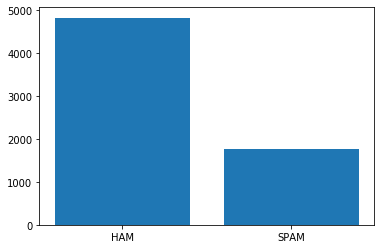

In [10]:
import matplotlib.pyplot as py
import numpy as np 

ham_size = len([ham for ham in master_data['label'] if ham =='ham'])
spam_size = len([spam for spam in master_data['label'] if spam == 'spam'])
print(f'ham lenght:{ham_size} spam lenght:{spam_size}')

X = np.array(['HAM' , 'SPAM'])
y  = np.array([ham_size , spam_size])
py.bar(X,y)
py.show()

#    # splitting kaggle data set into training and testing

In [11]:
from sklearn import model_selection

In [82]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset['message'], dataset['label'], test_size=1)
print('X lenght' , len(X_train))
print('x text len ', len(X_test))
print('y train lenght', len(y_train))
print('y test len', len(y_test))
print('data spliting completed')

X lenght 5571
x text len  1
y train lenght 5571
y test len 1
data spliting completed


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [85]:

st = stopwords.words('english')
def message_cleaner(word):
    return [t for t in word if not t in st]

cv = CountVectorizer(analyzer=message_cleaner ,max_features=5000)

# learn vocabulary and train 
X = cv.fit(X_train)
# print(X.vocabulary_)
X_train_cv = cv.transform(X_train)
print(X_train_cv.shape)
# vectorize testing X
X_test_cv = cv.transform(X_test)

print()
print('vectorizing complete.... ')

(5571, 5000)

vectorizing complete.... 


# splitting master dataset into testing and training

In [14]:
from sklearn import model_selection

In [87]:
X_master_train, X_master_test, y_master_train, y_master_test = model_selection.train_test_split(master_data['message'], master_data['label'])
print('X lenght' , len(X_master_train))
print('x text len ', len(X_master_test))
print('y train lenght', len(y_master_train))
print('y test len', len(y_master_test))
print(X_master_train[:10])
print('master data spliting completed................')

X lenght 4935
x text len  1645
y train lenght 4935
y test len 1645
2865    [say, slowli, godi, love, you, amp, I, need, y...
2329        [just, sent, Do, scream, moan, bed, princess]
1613                                    [meet, lunch, la]
3555    [compani, goodenviron, terrif, food, realli, n...
4207       [7, lor, chang, 2, suntec, wat, time, u, come]
3638    [hey, glad, u, r, better, I, hear, u, treat, u...
6419                 [I, ask, u, meet, da, ge, tmr, nite]
2988                       [shhhhh, nobodi, suppos, know]
4043                    [get, readi, ltgt, inch, pleasur]
5893    [for, mani, thing, antibiot, use, chest, abdom...
Name: message, dtype: object
master data spliting completed................


# VECTORIZING MASTER DATASET USING COUNTVECTORIZER

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [72]:

st = stopwords.words('english')
def message_cleaner(word):
    return [t for t in word if not t in st]

cv = CountVectorizer(analyzer=message_cleaner ,max_features=5000)

# learn vocabulary and train 
X = cv.fit(X_master_train)
# print(X.vocabulary_)
X_train_master_cv = cv.transform(X_master_train)
print(X_train_master_cv.shape)
# vectorize testing X
X_test_master_cv = cv.transform(X_master_test)

print()
print('vectorizing complete.... ')

(4935, 5000)

vectorizing complete.... 


# predicting kaggle data using ML algorithm  

In [88]:
from sklearn import metrics
from sklearn import model_selection 
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes

In [89]:
mnb = naive_bayes.MultinomialNB(alpha=0.2)
mnb.fit(X_train_cv , y_train)

y_mnb = mnb.predict(X_test_master_cv)
print('Naive Bayes Accuracy', metrics.accuracy_score(y_mnb, y_master_test))
# print('confustion matric ', metrics.confusion_matrix(y_mnb, y_master_test))

Naive Bayes Accuracy 0.6462006079027356


In [91]:
svc = svm.SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv , y_train)

y_svc = svc.predict(X_test_master_cv)
print('Support Vector Accuracy', metrics.accuracy_score(y_svc, y_master_test))

Support Vector Accuracy 0.7221884498480243


In [92]:
svc = svm.SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv , y_train)

y_svc = svc.predict(X_test_master_cv)
print('Naive Bayes Accuracy', metrics.accuracy_score(y_svc, y_master_test))

Naive Bayes Accuracy 0.7221884498480243


In [93]:
kn = neighbors.KNeighborsClassifier(n_neighbors=200)
kn.fit(X_train_cv , y_train)

y_kn = kn.predict(X_test_master_cv)
print('K nearest Neigbour Accuracy', metrics.accuracy_score(y_kn, y_master_test))

C:\Users\orsaater\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\orsaater\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: 

K nearest Neigbour Accuracy 0.7398176291793314


In [94]:
lgc = linear_model.LogisticRegression()
lgc.fit(X_train_cv , y_train)

y_lr = lgc.predict(X_test_master_cv)
print('logistic Regression Accuracy', metrics.accuracy_score(y_lr, y_master_test))

logistic Regression Accuracy 0.7361702127659574


C:\Users\orsaater\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\orsaater\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


# prediction master data using machine learning alogrithm (SVM, NB, LR etc)

In [66]:
from sklearn import metrics
from sklearn import model_selection 
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes

In [73]:
mnb = naive_bayes.MultinomialNB(alpha=0.2)
mnb.fit(X_train_master_cv , y_master_train)

y_mnb = mnb.predict(X_test_master_cv)
print('Naive Bayes Accuracy', metrics.accuracy_score(y_mnb, y_master_test))
# print('confustion matric ', metrics.confusion_matrix(y_mnb, y_master_test))

Naive Bayes Accuracy 0.9665653495440729


In [75]:
svc = svm.SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_master_cv , y_master_train)

y_svc = svc.predict(X_test_master_cv)
print('Naive Bayes Accuracy', metrics.accuracy_score(y_svc, y_master_test))
# print('confustion matric ', metrics.confusion_matrix(y_mnb, y_master_test))

Naive Bayes Accuracy 0.8814589665653495


In [78]:
kn = neighbors.KNeighborsClassifier(n_neighbors=200)
kn.fit(X_train_master_cv , y_master_train)

y_kn = kn.predict(X_test_master_cv)
print('K nearest Neigbour Accuracy', metrics.accuracy_score(y_kn, y_master_test))
# print('confustion matric ', metrics.confusion_matrix(y_mnb, y_master_test))

C:\Users\orsaater\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\orsaater\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: 

Naive Bayes Accuracy 0.7209726443768997


In [81]:
lgc = linear_model.LogisticRegression()
lgc.fit(X_train_master_cv , y_master_train)

y_lr = lgc.predict(X_test_master_cv)
print('logistic Regression Accuracy', metrics.accuracy_score(y_lr, y_master_test))

logistic Regression Accuracy 0.9738601823708206


C:\Users\orsaater\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
